In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import datetime as dtm

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import Series

import xlrd;
import openpyxl;
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv( r"Springleaf_Marketing_Response\train.csv", low_memory=False)
y_train = train['target']
train.pop('target')
modelFit = LogisticRegression().fit(train, y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\YaliRen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-5c78b2376798>", line 1, in <module>
    train = pd.read_csv( r"Springleaf_Marketing_Response\train.csv", low_memory=False)
  File "C:\Users\YaliRen\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 685, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\YaliRen\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 463, in _read
    data = parser.read(nrows)
  File "C:\Users\YaliRen\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 1154, in read
    ret = self._engine.read(nrows)
  File "C:\Users\YaliRen\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 2059, in read
    data = self._reader.read(nrows)
  File "pandas\_libs\parsers.pyx", line 884, in pandas._libs.parsers.TextReader.read
  File "pandas\_libs\parsers.pyx", line 

KeyboardInterrupt: 

In [ ]:
predicted_train_classes = modelFit.predict(train)
train_accuracy = accuracy_score(y_train, predicted_train_classes)
print (train_accuracy )

In [ ]:
desc  = train.describe().T
desc["missing%"] = 1 - desc['count']/len(train)
print (desc)

                          SelectedHookloadFiltered  TravBlockHookload  \
SelectedHookloadFiltered                  1.000000           0.977222   
TravBlockHookload                         0.977222           1.000000   
DeadlineHookload                          0.998404           0.975663   
MotorTorqueA                              0.995558           0.972481   
MotorTorqueB                              0.995739           0.972689   
MotorTorqueD                              0.995594           0.972433   
ElevatorPosition                          0.018461           0.018200   
DWBreaksOn                               -0.104058          -0.109107   
MotorASpeed                              -0.047342          -0.050003   
CompLoadFluidIndicator                   -0.193991          -0.203401   

                          DeadlineHookload  MotorTorqueA  MotorTorqueB  \
SelectedHookloadFiltered          0.998404      0.995558      0.995739   
TravBlockHookload                 0.975663      

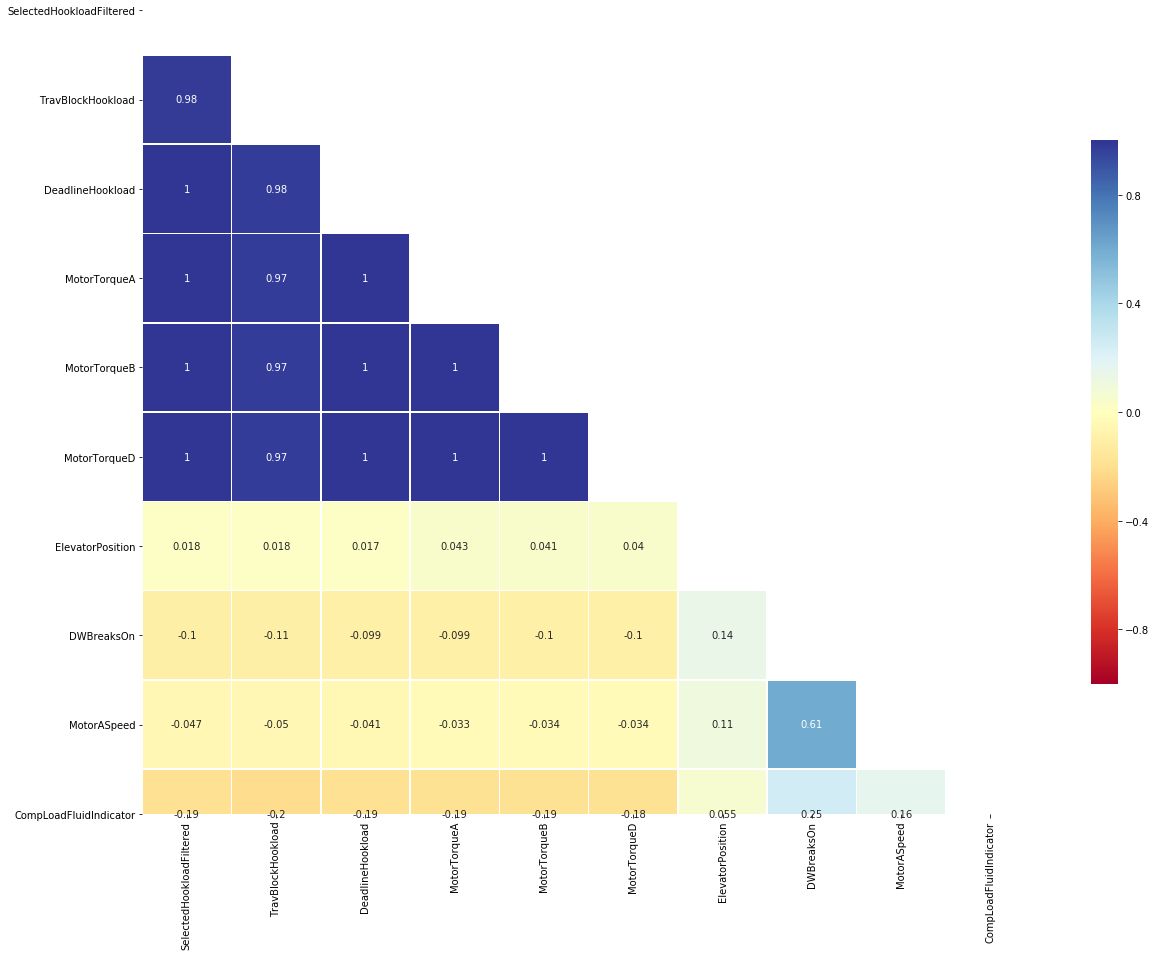

In [4]:
train = pd.read_csv( r"Springleaf_Marketing_Response\data.csv", low_memory=False)
del train['BlockSpeed']
del train['MotorTorqueE']
del train['MotorTorqueF']

train = train.iloc[:, 0:10]
corrMatrix = train.corr()
print (corrMatrix)

print (corrMatrix.shape)

print (type (corrMatrix))

mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatrix, annot=True, mask=mask, cmap="RdYlBu", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




In [5]:
corrMatrix = corrMatrix.drop("MotorTorqueA", axis=0)
print (corrMatrix)

                          SelectedHookloadFiltered  TravBlockHookload  \
SelectedHookloadFiltered                  1.000000           0.977222   
TravBlockHookload                         0.977222           1.000000   
DeadlineHookload                          0.998404           0.975663   
MotorTorqueB                              0.995739           0.972689   
MotorTorqueD                              0.995594           0.972433   
ElevatorPosition                          0.018461           0.018200   
DWBreaksOn                               -0.104058          -0.109107   
MotorASpeed                              -0.047342          -0.050003   
CompLoadFluidIndicator                   -0.193991          -0.203401   

                          DeadlineHookload  MotorTorqueA  MotorTorqueB  \
SelectedHookloadFiltered          0.998404      0.995558      0.995739   
TravBlockHookload                 0.975663      0.972481      0.972689   
DeadlineHookload                  1.000000     

In [10]:
# print (corrMatrix.keys())

# corrTol = 0.8

# for col in corrMatrix:
#     print (col)
#     if col in corrMatrix.keys():
#         thisCol = []
#         thisVars = []
        
#         for i in range(len(corrMatrix)):
#             if abs(corrMatrix[col][i]) == 1.0 and col != corrMatrix.keys()[i]:
#                 thisCorr = 0
#             else:
#                 thisCorr = (1 if abs(corrMatrix[col][i]) > corrTol else -1) * abs(temp[corrMatrix.keys()[i]])
            
#             thisCol.append(thisCorr)
#             thisVars.append()

#         mask = np.ones(len(thisCol), dtype= bool)
#         ctDelCol = 0
#         for n, j in enumerate(thisCol):
#             mask[n] = not (j != max(thisCol) and j>0)
#             if j != max(thisCol) and j>=0:
#                 corrMatrix.pop("%s" %thisVars[n])
#                 temp.pop("%s" %thisVars[n])
#                 ctDelCol += 1
                
                
#         corrMatrix = corrMatrix[mask]      
        
#         for i, val in enumerate (w):
#             if val== min(w):
#             for j, vec in enumerate (v[:, j]):
#                 if abs(vec) == max(abs(v[:, i])):
#                     mask = np.ones(len(corrMatrix.keys()))
#                     for n, col in enumerate (corrMatrix.keys()):
#                         mask[n] = n!=j
#                     corrMatrix = corrMatrix[mask]
#                     corrMatrix.pop(cols[j])
                    
        

SyntaxError: invalid syntax (<ipython-input-10-c16c9b26c22f>, line 11)

In [6]:
ct = len (corrMatrix)
print (ct)

w, v =np.linalg.eig(corrMatrix)
# print (w)
# print (v)

# w1 = (max(w)/min(w)) ** 0.5
# print (w1)

if ct > 6:
    print ("\n" + "Performing multicollinearity analysis")
    while True:
        print ("***********************")
        ct = ct - 1
        cols = corrMatrix.keys()
        w, v =np.linalg.eig(corrMatrix)
#         print (w)
#         print (v)
        w1 = (max(w)/min(w)) ** 0.5
        print (w1)
        if w1 <= 30 or ct == 6:
            break
            
        for i, val in enumerate(w):
            print ("-----------------------------------")
        
            
            if val== min(w):
#                 print (i)
#                 print (val)
           
                for j, vec in enumerate (v[:, i]):
                    
                  
                    if abs(vec) == max(abs(v[:, i])):
#                         print (j)
#                         print (vec)
                        mask = np.ones(len(corrMatrix.keys())).astype(np.int)
#                         print (mask)
                        for n, col in enumerate (corrMatrix.keys()):
                            mask[n] = n!=j
#                         print (mask)
#                         corrMatrix = corrMatrix[mask]
#                         print (corrMatrix)
                        print (cols[j])
                        corrMatrix = corrMatrix.drop(corrMatrix.keys()[j],axis =0)
                        corrMatrix.pop(cols[j])
#                         print (corrMatrix.keys())
                        print (corrMatrix)
                        
                
            

9


LinAlgError: Last 2 dimensions of the array must be square

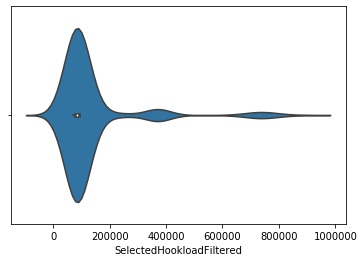

In [43]:
sns.violinplot(x=train.SelectedHookloadFiltered )

[[-0.37135417 -0.4106736  -0.34100633 ...  2.62505411  4.3275019
   1.19971308]
 [-0.37734139 -0.38586218 -0.37203763 ...  2.62505411  4.3275019
   1.17402105]
 [-0.37750617 -0.38586218 -0.37191191 ...  2.62505411  4.3275019
   1.16112505]
 ...
 [-0.34289185 -0.35428424 -0.25638279 ... -0.38094453 -0.2310802
   1.46453087]
 [-0.38545834 -0.39488453 -0.37088088 ... -0.38094453 -0.2310802
  -0.25973389]
 [-0.38211601 -0.3993957  -0.37088088 ... -0.38094453 -0.2310802
  -0.25973389]]
(434, 10)


Text(0.5, 0, 'Principle component')

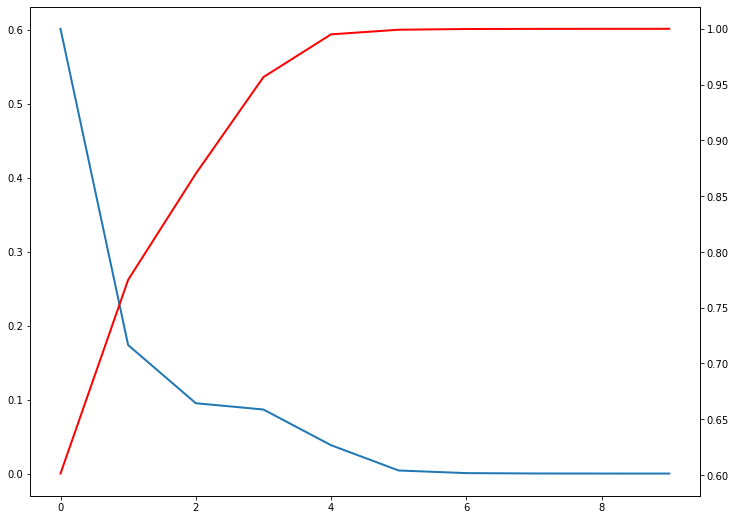

In [34]:
from sklearn.decomposition import PCA
import pylab as pl
train_scaled = sk.preprocessing.scale (train)
print (train_scaled)
print (train_scaled.shape)
pca = PCA().fit(train_scaled)
# print (len(pca))

pl.figure (figsize =(12,9))
ax1 =plt.subplot(111)
ax2 = ax1.twinx()
ax1.plot(pca.explained_variance_ratio_, linewidth = 2)
ax2.plot(pca.explained_variance_ratio_.cumsum(), linewidth = 2, color = 'r')
pl.xlabel("Principle component")


In [31]:
reduced_data = PCA(n_components = 4).fit_transform(train_scaled)
print (reduced_data.shape)
print (reduced_data)

(434, 4)
[[-1.34796506  4.2087963   3.3553494   0.81070404]
 [-1.29998476  4.20493886  3.35281281  0.83097705]
 [-1.29977265  4.20065479  3.3515059   0.84304411]
 ...
 [-0.77065744  0.24157354 -0.80120365 -1.45977327]
 [-0.84643238 -0.29635985 -1.14768773  0.158     ]
 [-0.87913156 -0.29961663 -1.14803371  0.16063516]]


In [38]:
from sklearn.cluster import FeatureAgglomeration
varClus = FeatureAgglomeration(n_clusters = 4)
varClus.fit(train_scaled)
train_varClus = varClus.fit_transform(train_scaled)
print (train_varClus.shape)
print (train_varClus)

print (train_scaled.shape)
print (train_scaled)


(434, 4)
[[ 3.47627801 -0.3827035  -2.15815183  1.19971308]
 [ 3.47627801 -0.36398236 -2.15815183  1.17402105]
 [ 3.47627801 -0.36440649 -2.15815183  1.16112505]
 ...
 [-0.30601236 -0.27450289  0.856299    1.46453087]
 [-0.30601236 -0.37478854  1.0291465  -0.25973389]
 [-0.30601236 -0.38820936  1.0291465  -0.25973389]]
(434, 10)
[[-0.37135417 -0.4106736  -0.34100633 ...  2.62505411  4.3275019
   1.19971308]
 [-0.37734139 -0.38586218 -0.37203763 ...  2.62505411  4.3275019
   1.17402105]
 [-0.37750617 -0.38586218 -0.37191191 ...  2.62505411  4.3275019
   1.16112505]
 ...
 [-0.34289185 -0.35428424 -0.25638279 ... -0.38094453 -0.2310802
   1.46453087]
 [-0.38545834 -0.39488453 -0.37088088 ... -0.38094453 -0.2310802
  -0.25973389]
 [-0.38211601 -0.3993957  -0.37088088 ... -0.38094453 -0.2310802
  -0.25973389]]


AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [44]:
pd_train_varClus = pd.DataFrame(train_varClus)
pd_train_varClus['4'] = train.iloc[:,0]
print (pd_train_varClus.shape)

print (abs(pd_train_varClus.corr()))

# for var in range (4):
#     y = train.iloc[:,0].values
#     print (abs(y.corr(train_varClus[:, var])))

(434, 5)
          0         1         2         3         4
0  1.000000  0.079480  0.140130  0.229296  0.084462
1  0.079480  1.000000  0.029892  0.192336  0.998035
2  0.140130  0.029892  1.000000  0.054793  0.018461
3  0.229296  0.192336  0.054793  1.000000  0.193991
4  0.084462  0.998035  0.018461  0.193991  1.000000


C:\Users\YaliRen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: bad input shape ()

In [63]:
# import random
# y = random.choice([0, 1], 434)
# print (y)

y =[]
for i in range(434):
    y.append(random.randint(0,1))
print (y)

[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 

In [65]:
y_series=pd.Series(y)
print (y_series)

0      1
1      1
2      1
3      1
4      0
      ..
429    0
430    0
431    0
432    1
433    0
Length: 434, dtype: int64


In [66]:
logistic_model = LogisticRegression(penalty = 'l1', random_state = 314)
thisLassoFit = logistic_model.fit (train_varClus, y_series)
print (thisLassoFit)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=314, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\YaliRen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
thisLassoFit.coef_[0]
print (thisLassoFit.coef_)

[[0.07758752 0.04714438 0.04045339 0.14414509]]


In [84]:
model_coff = np.transpose(thisLassoFit.coef_)[np.where(thisLassoFit.coef_ != 0)[1]]
print (model_coff)

thisLassoPreds = train.keys()[np.where(thisLassoFit.coef_ != 0)[1]]
print (thisLassoPreds)

print (pd.DataFrame(zip(thisLassoPreds,model_coff[:, 0])))

# model_coff = np.transpose(thisLassoFit.coef_)

[[0.07758752]
 [0.04714438]
 [0.04045339]
 [0.14414509]]
Index(['SelectedHookloadFiltered', 'TravBlockHookload', 'DeadlineHookload',
       'MotorTorqueA'],
      dtype='object')
                          0         1
0  SelectedHookloadFiltered  0.077588
1         TravBlockHookload  0.047144
2          DeadlineHookload  0.040453
3              MotorTorqueA  0.144145


In [88]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100)
X_new = clf.fit(train_varClus, y_series)
imps_moistAll=X_new.feature_importances_
print (imps_moistAll)
indices=np.argsort(abs(imps_moistAll))[::-1]
print (indices)

orderedParams['DTree'] = {}
orderedImportances = {}

for rank, ind in enumerate (indices):
    var = train.keys()[ind]
    orderedParams['DTree'][rank] = var
    orderedImportances[var] = imps_moistAll[ind]
    
print (orderedParams['DTree'] )
print (orderedImporances )

[0.01393141 0.4668922  0.23466769 0.2845087 ]
[1 3 2 0]


NameError: name 'orderedParams' is not defined

In [91]:
from sklearn.cluster import FeatureAgglomeration
varClus = FeatureAgglomeration(n_clusters = 9)
varClus.fit(train_scaled)
train_varClus = varClus.fit_transform(train_scaled)
print (train_varClus.shape)
print (train_varClus)

print (train_scaled.shape)
print (train_scaled)

(434, 9)
[[-0.39090565  1.19971308 -2.15815183 ... -0.34100633 -0.37135417
  -0.39137562]
 [-0.34022774  1.17402105 -2.15815183 ... -0.37203763 -0.37734139
  -0.36819747]
 [-0.34022774  1.16112505 -2.15815183 ... -0.37191191 -0.37750617
  -0.37070321]
 ...
 [-0.23310461  1.46453087  0.856299   ... -0.25638279 -0.34289185
  -0.22724924]
 [-0.3643418  -0.25973389  1.0291465  ... -0.37088088 -0.38545834
  -0.3688239 ]
 [-0.3930572  -0.25973389  1.0291465  ... -0.37088088 -0.38211601
  -0.39074918]]
(434, 10)
[[-0.37135417 -0.4106736  -0.34100633 ...  2.62505411  4.3275019
   1.19971308]
 [-0.37734139 -0.38586218 -0.37203763 ...  2.62505411  4.3275019
   1.17402105]
 [-0.37750617 -0.38586218 -0.37191191 ...  2.62505411  4.3275019
   1.16112505]
 ...
 [-0.34289185 -0.35428424 -0.25638279 ... -0.38094453 -0.2310802
   1.46453087]
 [-0.38545834 -0.39488453 -0.37088088 ... -0.38094453 -0.2310802
  -0.25973389]
 [-0.38211601 -0.3993957  -0.37088088 ... -0.38094453 -0.2310802
  -0.25973389]]


In [92]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100)
X_new = clf.fit(train_varClus, y_series)
imps_moistAll=X_new.feature_importances_
print (imps_moistAll)
indices=np.argsort(abs(imps_moistAll))[::-1]
print (indices)


sortedVars = []

for rank, ind in enumerate (indices):
    var = train.keys()[ind]
    sortedVars.append(var)

print (sortedVars)

[0.1504559  0.13230267 0.11834282 0.00421154 0.00886467 0.12733247
 0.1493096  0.15655989 0.15262046]
[7 8 0 6 1 5 2 4 3]
['DWBreaksOn', 'MotorASpeed', 'SelectedHookloadFiltered', 'ElevatorPosition', 'TravBlockHookload', 'MotorTorqueD', 'DeadlineHookload', 'MotorTorqueB', 'MotorTorqueA']


In [93]:
j-dropCt = 0
maxSteps = 6

for j, var in enumerate (sortedVars):
    print (j, var)
    okayToAdd = 0

0 DWBreaksOn
1 MotorASpeed
2 SelectedHookloadFiltered
3 ElevatorPosition
4 TravBlockHookload
5 MotorTorqueD
6 DeadlineHookload
7 MotorTorqueB
8 MotorTorqueA
